# **21-02-22**

#Filter based feature selection method :

#-> 2. Mutual information classifier method : 

In [2]:
from sklearn.datasets import load_iris
data=load_iris()

In [3]:
X,y=load_iris(return_X_y=True)

In [4]:
import pandas as pd

In [5]:
df=pd.DataFrame(data.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
from sklearn.feature_selection import mutual_info_classif

In [7]:
import matplotlib.pyplot as plt

In [8]:
importance =mutual_info_classif(X,y) #it'll give the importance of all the features

In [9]:
df.columns

RangeIndex(start=0, stop=4, step=1)

Viewing the features importance for plotting the graph :

In [10]:
feature_importance=pd.Series(importance, df.columns[0:len(df.columns)]) 
#in df.columns[0:len(df.columns)] considering all the features based on the target
#only features included
#i.e. column : 0,1,2,3 are included

in below o/p 0,1,2,3 are the columns of dataframe and corresponding to them their importance is mentioned :

In [11]:
feature_importance

0    0.514131
1    0.291495
2    0.990521
3    0.985277
dtype: float64

Now, based on the importance of features a graph will be plotted :

** ---extra--- **

** bar plotting **

<function matplotlib.pyplot.show>

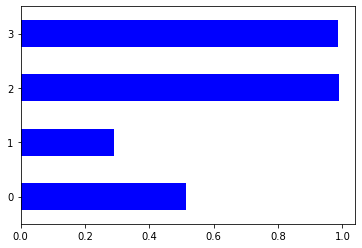

In [12]:
feature_importance.plot(kind='barh', color='blue') #kind is what kind of plotting we want, and color is graph color
plt.show


in above graph : 

3 is petal width

2 is petal length

Note : we'll take features whose importance is good. and the no. of features will depend on us that how many features we want to take.

----

note : filter based features selection is very simple and it is independent of classifier or regressor model.

but in some cases it happens that filter based feature selection method is not able to select all the features that are very relevant, that's why we have Wrapper based feature selection method.

Wrapper based feature selection method - in this we selection the features based on all the features i.e. for ex: first we'll take one feature and go for classifier, then we'll take 2 features and go for classifier and so on, i.e. we'll consider all the subsets of the features. And we also need a model to know that which of the features subset will give the higher performance. Highest performance subset will be selected.





We can compare that : wrapper based feature selection method is difficult than filter based feature selection method.

Bcz in Wrapper based feature selection we have to make so many iterations and check for each subset and run the model.

In above code we have used mutual information classifier - filter based feature selection method. We have not used and model i.e. regression or classification, we have just seen the importance of feature. Therefore, we can say that filter based feature selection method is model independent.

But in wrapper based feature selection method, it can happen that decision tree classifer will select a subset as the best subset, and, logistic regression classifier will select another subset as the best. Therefore, we can say that wrapper based feature selection method is model dependent.
And it is also giving the higher complexity bcz we have to selection features based on the model as well and it'll check all the subset. 

Even though wrapper based feature selection method is complex, but in real secenrio we'll prefer it as it can handle thousands of features very efficiently bcz filter based feature selection method is not a robust technique in case of large no. of feature set.

----

#Wrapper based feature selection method :

there are 3 feature selection methods in this and we can use them with any model(regression/classification) :

In [13]:
from sklearn.datasets import load_iris
data=load_iris()

In [14]:
import pandas as pd
import numpy as np

In [15]:
feature_names=load_iris().feature_names #for getting feature names

In [16]:
#load_iris().data : data of features
#columns=feature_names : for giving features name to columns

X_data=pd.DataFrame(load_iris().data,columns=feature_names)
X_data  #dataframe containing features only

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
y_data=load_iris().target
target_names=load_iris().target_names

Note : while going for model for iris dataset we choose classification bcz we want to classify our data into categories(3 categorise) but, here while feature selection we don't want to classify anything we only want to featch features and the features are not categorical i.e. petal length & width, sepal length & width these are not categories these are just columns, so, we can apply any of the regression technique for feature selection as a model is needed to apply wrapper based feature selection method.

#Using logistic regression for selection features :

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr= LogisticRegression()

**Most commonly used techniques under wrapper methods are:**

1. Forward selection

2. Backward elimination ,or, backward selection

3. Bi-directional elimination(Stepwise Selection)

4. Exhaustive feature selector

In case of backward selection we use forward feature selection but, in the parameter i.e. forward, we will make it False.

#**-> Exhaustive feature selector :**

it'll take each and every subset of the features and check in the logistic regression model the performance of which subset is the highest, and then in classification model for load iris that subset will be taken which is giving the highest performance.

In [20]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [21]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [22]:
#creating object

#first parameter is the estimator, here we have taken lr as estimator
efs= EFS(estimator=lr, min_features=1, max_features=3, scoring="accuracy", cv=5) 

#min_features, max_features is no. of features in subset
#max_feature can be changed according to us

#cv stands for cross validation, here it'll take 5 times to select

#other not specified parameters in EFS() will take default values

for selecting the best features, we have to fit data in our model :

In [23]:
efs=efs.fit(X_data, y_data)

#in o/p 14/14 denotes 14 possible subsets i.e. {0},{1},{2},{3},{0,1}, so on.

Features: 14/14

above statement is giving warning bcz in logistic regression we have to pass paramerter in lr= LogisticRegression(), but we have not passed it.

-> viewing best score of the subsets : 

In [24]:
print("Best scores: %.2f" %efs.best_score_) # %.2f is upto 2 decimal places

Best scores: 0.97


-> viewing indexes of features of the subset which is giving the best score :

(0- sepal length, 2- petal length, 3-petal width

In [25]:
print("Best subset: ", efs.best_idx_)

Best subset:  (0, 2, 3)


-> viewing names of features in subset:

In [26]:
print("Best subset name: ", efs.best_feature_names_)

Best subset name:  ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


Now, our X_data will be changes as we are taking only 3 features(best subset) instead of 4 :

In [27]:
X_data_new=efs.fit(X_data,y_data)

Features: 14/14

->viewing performance of all subsets :

In [28]:
efs_results=pd.DataFrame.from_dict(efs.get_metric_dict()).T #.T is used for making transpose
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
#in cross validation there are 5 iterations, therefore, taking avg_score for sorting

efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
11,"(0, 1, 3)","[0.9, 0.9666666666666667, 0.9333333333333333, ...",0.946667,"(sepal length (cm), sepal width (cm), petal wi...",0.043691,0.033993,0.016997
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.051412,0.04,0.02


we got score 0.97 bcz 0.96666.. is rounded off to 0.97

avg score if avg of all 5 cv_score

----

#Now, training the model (classification):

instead of X_data, X_data_new will be used as it is our new features after implementing exhaustive feature selector method (wrapper based feature selection method).

In [29]:
X_new_best= X_data_new.transform(X_data)

In [31]:
X_new_best

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [34]:
X_new_best.shape

(150, 3)

In [35]:
feature_name_new = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']

In [36]:
X_new_best=pd.DataFrame(X_new_best,columns=feature_name_new)
X_new_best

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [37]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_new_best, y_data, test_size=0.20, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [40]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred=model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



-----

# FORWARD / SEQUENTIAL FEATURE SELECTION : 

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [49]:
sfs= SFS(estimator=lr, k_features=(1,3), forward=True, scoring="accuracy", cv=5) 

#k-features(min_features ,max_features)

In [50]:
sfs=sfs.fit(X_data,y_data)

In [51]:
print('Best Scores: %.2f' %sfs.k_score_)

Best Scores: 0.97


In [52]:
print('Best Subset',sfs.k_feature_idx_)

Best Subset (0, 2, 3)


In [53]:
print('Best Subset name',sfs.k_feature_names_)

Best Subset name ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


In [54]:
X_data_sfs=sfs.fit(X_data,y_data)

In [55]:
sfs_results=pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_results.sort_values(by='avg_score',ascending=True,inplace=True)
sfs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)",0.049963,0.038873,0.019437
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))",0.032061,0.024944,0.012472
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w...",0.027096,0.021082,0.010541


----

#SEQUENTIAL FEATURE SELECTION - backward :

Same as forward selection only : sbs= BFS(estimator=lr, k_features=(1,3), forward=True, scoring="accuracy", cv=5) , forward=Flase will be made. 

In [82]:
#backward feature selection
sbs=SFS(estimator=lr,k_features=(1,3),forward=False,scoring='accuracy',cv=5)

In [ ]:
sbs=sbs.fit(X_data,y_data)

In [ ]:
print('Best Scores: %.2f' %sbs.k_score_)

In [ ]:
print('Best Subset',sbs.k_feature_idx_)

In [ ]:
print('Best Subset name',sbs.k_feature_names_)

In [ ]:
X_data_sbs=sbs.fit(X_data,y_data)

In [ ]:
sbs_results=pd.DataFrame.from_dict(sbs.get_metric_dict()).T
sbs_results.sort_values(by='avg_score',ascending=True,inplace=True)
sbs_results